# Model Validation

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Model Capacity
import Packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
# pandas DataFrame
# 'Electric.csv' From github
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'

Elec = pd.read_csv(url)

Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [5]:
# y=electricity, x=surface_area
Elec.head() 

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,155.5
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,155.5
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,155.5
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,155.5
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,208.4


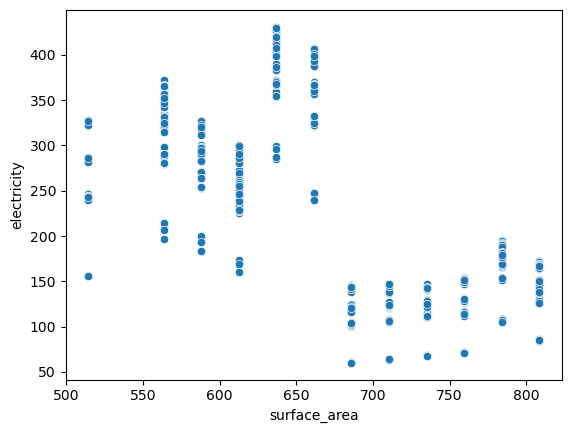

In [6]:
# 산점도(surface_area vs. electricity)
sns.scatterplot(x = Elec['surface_area'], y = Elec['electricity'])
plt.show()

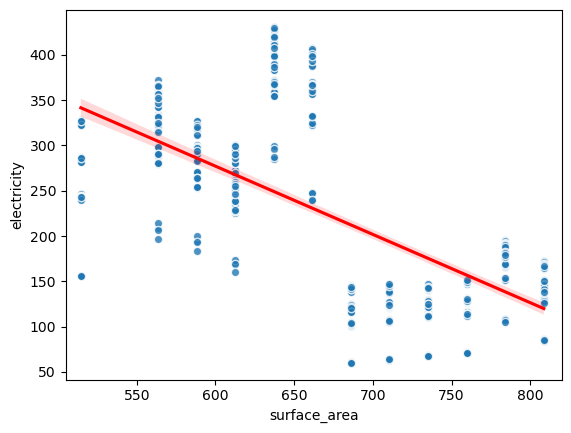

In [7]:
# 1차 모델 시각화
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
            line_kws = {'color':'red'},
            scatter_kws = {'edgecolor' : 'white'})
plt.xlim(505, 820)
plt.show()

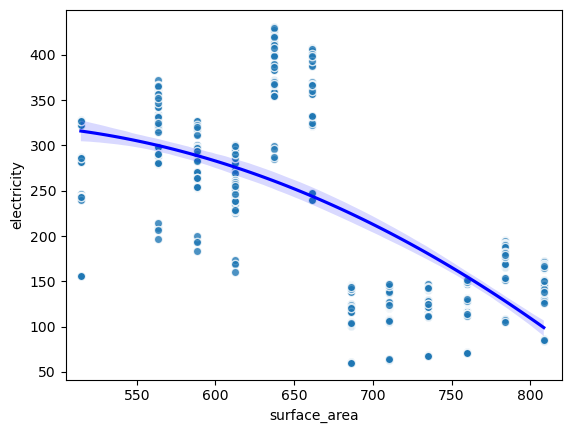

In [9]:
# 2차 모델 시각화
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
            line_kws = {'color':'blue'},
            scatter_kws = {'edgecolor' : 'white'},
            order = 2) # order 다항식 회귀식을 위한 항의 개수
plt.xlim(505, 820)
plt.show()

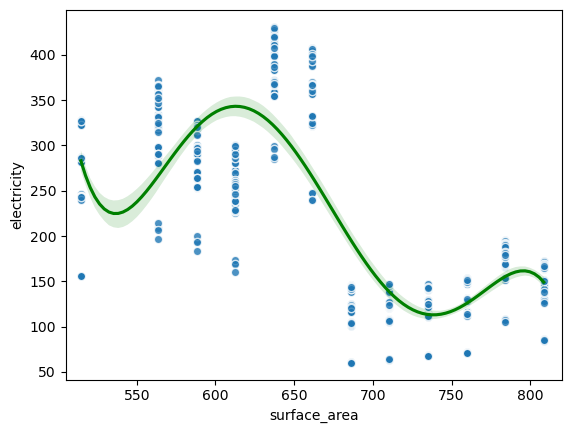

In [10]:
# 5차 모델 시각화
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
            line_kws = {'color':'green'},
            scatter_kws = {'edgecolor' : 'white'},
            order = 5)
plt.xlim(505, 820)
plt.show()

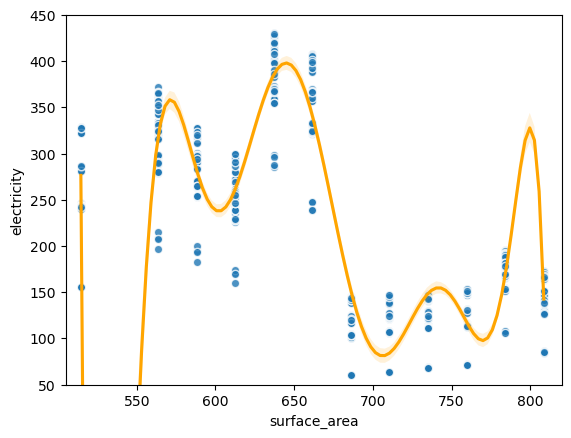

In [11]:
# 9차 모델 시각화
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
            line_kws = {'color':'orange'},
            scatter_kws = {'edgecolor':'white'},
            order = 9)
plt.xlim(505, 820)
plt.ylim(50, 450)
plt.show()

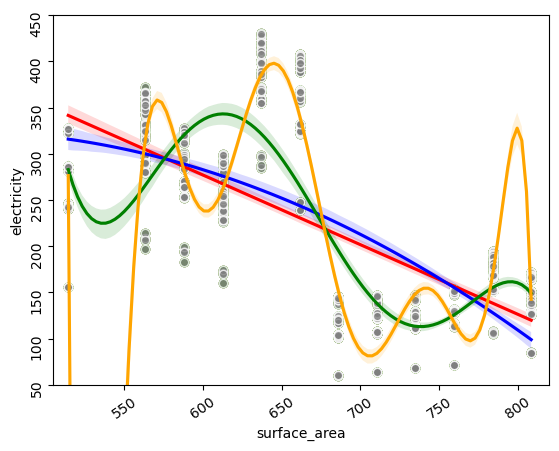

In [12]:
# 4개 모델 비교 시각화
sns.regplot(x = 'surface_area', y = 'electricity', 
            data = Elec, 
            line_kws = {'color':'red'})
sns.regplot(x = 'surface_area', y = 'electricity', 
            data = Elec, 
            line_kws = {'color':'blue'}, order = 2)
sns.regplot(x = 'surface_area', y = 'electricity', 
            data = Elec, 
            line_kws = {'color':'green'}, order = 5)
sns.regplot(x = 'surface_area', y = 'electricity', 
            data = Elec, 
            line_kws = {'color':'orange'}, order = 9,
            scatter_kws = {'color':'gray', 'edgecolor':'white'})
plt.xlim(505, 820)
plt.ylim(50, 450)
plt.xticks(rotation = 35)
plt.yticks(rotation = 90)
plt.show()

# Training Error
## import Packages

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [14]:
# pandas DataFrame
# 'Electric.csv' From github
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'

Elec = pd.read_csv(url)

Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [16]:
# 1차 모델 Training Error
# X_train and y_train
X_train = Elec[['surface_area']]
y_train = Elec['electricity']

X_train.shape, y_train.shape

((768, 1), (768,))

In [17]:
# 모델 생성
from sklearn.linear_model import LinearRegression

Model_1 = LinearRegression()
Model_1.fit(X_train, y_train)


LinearRegression()

In [18]:
# 모델 정보(학습결과) 확인
print(Model_1.coef_) # w
print(Model_1.intercept_) # b


[-0.75387157]
729.4538243006995


In [19]:
# y_hat(예측값) 생성
y_hat_1 = Model_1.predict(X_train)

len(y_hat_1)

768

In [20]:
# MSE(Mean Squared Error) 계산
TR_Err_1 = np.mean((y_train - y_hat_1) ** 2)
TR_Err_1

5763.983779426344

In [21]:
# 5차 모델 Training Error
# X 다항차수 변환
# (768, 1) to (768, 5)
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5, include_bias = False)
PX_5 = poly.fit_transform(X_train)
X_train[:3]

,surface_area
0,514.5
1,514.5
2,514.5


In [22]:
PX_5[:3]

array([[5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       [5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       [5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13]])

In [23]:
X_train.shape, PX_5.shape

((768, 1), (768, 5))

In [26]:
# 5차 모델 생성
from sklearn.linear_model import LinearRegression

Model_5 = LinearRegression()
Model_5.fit(PX_5, y_train)

LinearRegression()

In [27]:
# 모델 정보(학습결과) 확인
np.set_printoptions?

In [28]:
# precision 부동소수점 출력의 정밀도 자릿수(기본값 8)
# suppress False인 경우 과학적 표기법 사용(True인 경우 항상 고정소수점으로 부동소수점숫자 출력)
np.set_printoptions(suppress = True, precision = 40)

print(Model_5.coef_)
print(Model_5.intercept_)

[-0.00031551372172212663     -0.10292951716935603
  0.0003787612488756518      -0.0000005032062325219504
  0.000000000229805868778854]
2906.2067737922907


In [29]:
# y_hat(예측값) 생성
PX_5_pred = poly.fit_transform(X_train)

y_hat_5 = Model_5.predict(PX_5_pred)

y_hat_5.shape

(768,)

In [30]:
# MSE(Mean Squared Error) 계산
TR_Err_5 = np.mean((y_train - y_hat_5) ** 2)
TR_Err_5

4177.726327989532

# 9차 모델 Training Error

In [31]:
# X 다항차수 변환
# (768, 1) to (768, 9)
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 9, include_bias = False)
PX_9 = poly.fit_transform(X_train)
X_train.shape, PX_9.shape

((768, 1), (768, 9))

In [32]:
# 모델 생성
from sklearn.linear_model import LinearRegression

Model_9 = LinearRegression()
Model_9.fit(PX_9, y_train)

LinearRegression()

In [33]:
# 모델 정보(학습결과) 확인
print(Model_9.coef_)
print(Model_9.intercept_)

[ 0.0000000000000000000000000479174184633215
  0.000000000000000004015893999836899
  0.00000000000000000002199921364137338
  0.000000000000000009606888447643204
  0.0000000000000031773264060209207
  0.0000000000006336691113677805
 -0.000000000000002288058963970438
  0.000000000000000002775149473672874
 -0.0000000000000000000011271003952619528   ]
-440.08258372654484


In [34]:
# y_hat(예측값) 생성
PX_9_pred = poly.fit_transform(X_train)

y_hat_9 = Model_9.predict(PX_9_pred)

y_hat_9.shape

(768,)

In [35]:
# MSE(Mean Squared Error) 계산
TR_Err_9 = np.mean((y_train - y_hat_9) ** 2)
TR_Err_9

4086.7199908136754

In [36]:
# 3개 모델 Training Error 비교
print('1차 모델 : ', TR_Err_1)
print('5차 모델 : ', TR_Err_5)
print('9차 모델 : ', TR_Err_9)

1차 모델 :  5763.983779426344
5차 모델 :  4177.726327989532
9차 모델 :  4086.7199908136754


In [37]:
# Testing Error
# import Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [38]:
# pandas DataFrame
# 'Electric.csv' From github
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'

Elec = pd.read_csv(url)

Elec.shape

(768, 9)

In [39]:
# Train_Data vs. Test_Data
# DataFrame Split
# 8:2 Split(614:154)
# 80% Train_DF & 20% Test_DF
from sklearn.model_selection import train_test_split

TR_Elec, TE_Elec = train_test_split(Elec, 
                                    test_size = 0.2, 
                                    random_state = 2045)
TR_Elec.shape, TE_Elec.shape

((614, 9), (154, 9))

In [40]:
# 80% TR_Elec DataFrame
TR_Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
555,0.74,686.0,245.0,220.5,3.5,5,0.40,1,145.5
355,0.79,637.0,343.0,147.0,7.0,5,0.25,2,389.8
200,0.86,588.0,294.0,147.0,7.0,2,0.10,4,264.4
669,0.62,808.5,367.5,220.5,3.5,3,0.40,3,163.5
561,0.69,735.0,294.0,220.5,3.5,3,0.40,1,147.0


In [41]:
# 20% TE_Elec DataFrame
TE_Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
414,0.71,710.5,269.5,220.50,3.5,4,0.25,3,121.0
475,0.64,784.0,343.0,220.50,3.5,5,0.25,4,166.2
511,0.71,710.5,269.5,220.50,3.5,5,0.25,5,122.7
213,0.76,661.5,416.5,122.50,7.0,3,0.10,4,323.8
339,0.98,514.5,294.0,110.25,7.0,5,0.25,2,286.0


In [42]:
# Array Split
# X_train, X_test & y_train, y_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Elec[['surface_area']], 
                                                    Elec['electricity'], 
                                                    test_size = 0.2, 
                                                    random_state = 2045)
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((614, 1), (614,), (154, 1), (154,))

In [43]:
# 80% X_train Array
X_train.head()

,surface_area
555,686.0
355,637.0
200,588.0
669,808.5
561,735.0


In [44]:
# 80% y_train Array
y_train.head()

555    145.5
355    389.8
200    264.4
669    163.5
561    147.0
Name: electricity, dtype: float64

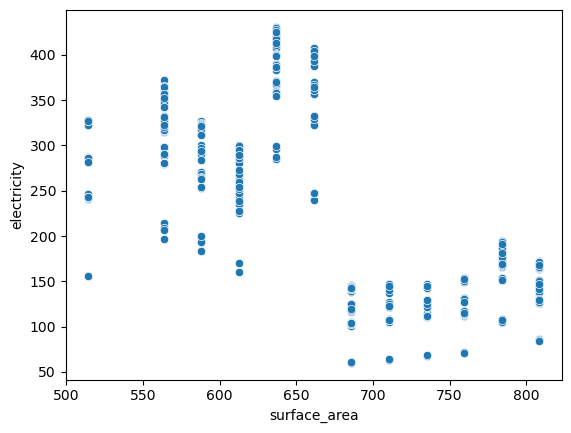

In [45]:
# Distribution Visualization
# Train Data
sns.scatterplot(x = TR_Elec['surface_area'], y = TR_Elec['electricity'])
plt.show()

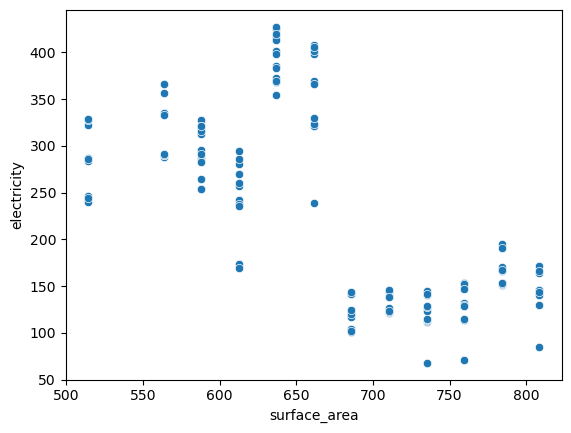

In [46]:
# Test Data
sns.scatterplot(x=TE_Elec['surface_area'], y = TE_Elec['electricity'])
plt.show()

In [47]:
# 1차 모델 Testing Error
# Train_Data로 모델 생성
from sklearn.linear_model import LinearRegression

Model_1 = LinearRegression()
Model_1.fit(X_train, y_train)


LinearRegression()

In [48]:
# Test_Data로 y_hat(예측값) 생성
y_hat_1 = Model_1.predict(X_test)

y_hat_1.shape

(154,)

In [49]:
# Test_Data로 MSE(Mean Squared Error) 계산
from sklearn.metrics import mean_squared_error

TE_Err_1 = mean_squared_error(y_test, y_hat_1)
TE_Err_1

6044.176547629271

In [50]:
# 5차 모델 Testing Error
# Train_Data로 모델 생성
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5, include_bias = False)
PX_5_TR = poly.fit_transform(X_train)
from sklearn.linear_model import LinearRegression

Model_5 = LinearRegression()
Model_5.fit(PX_5_TR, y_train)

LinearRegression()

In [51]:
# Test_Data로 y_hat(예측값) 생성
PX_5_TE = poly.fit_transform(X_test)

y_hat_5 = Model_5.predict(PX_5_TE)

In [52]:
# Test_Data로 MSE(Mean Squared Error) 계산
from sklearn.metrics import mean_squared_error

TE_Err_5 = mean_squared_error(y_test, y_hat_5)
TE_Err_5

4330.600224126612

In [53]:
# 9차 모델 Testing Error
# Train_Data로 모델 생성
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 9, include_bias = False)
PX_9_TR = poly.fit_transform(X_train)
from sklearn.linear_model import LinearRegression

Model_9 = LinearRegression()
Model_9.fit(PX_9_TR, y_train)

LinearRegression()

In [54]:
# Test_Data로 y_hat(예측값) 생성
PX_9_TE = poly.fit_transform(X_test)

y_hat_9 = Model_9.predict(PX_9_TE)

In [55]:
# Test_Data로 MSE(Mean Squared Error) 계산
from sklearn.metrics import mean_squared_error

TE_Err_9 = mean_squared_error(y_test, y_hat_9)
TE_Err_9

4238.689067444602

In [56]:
# 3개 모델 Testing Error 비교
print('1차 모델 : ', TE_Err_1)
print('5차 모델 : ', TE_Err_5)
print('9차 모델 : ', TE_Err_9)

1차 모델 :  6044.176547629271
5차 모델 :  4330.600224126612
9차 모델 :  4238.689067444602


In [57]:
# Validation Approach
# import Packages
import pandas as pd

In [58]:
# pandas DataFrame
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'

Elec = pd.read_csv(url)

Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [59]:
'''Train vs. Validation vs. Test
6:2:2 Split(462:153:153)
sklearn Package 사용
train_test_split( )
20% Test_Data(153)'''
from sklearn.model_selection import train_test_split

X_remain, X_test, y_remain, y_test = train_test_split(Elec[['surface_area']], 
                                                      Elec['electricity'], 
                                                      test_size = int(len(Elec) * 0.2),
                                                      random_state = 2045)

print(X_remain.shape, y_remain.shape)
print(X_test.shape, y_test.shape)

(615, 1) (615,)
(153, 1) (153,)


In [60]:
# 60% Train_Data(462) & 20% Validation_Data(153)
# 남은 80%학습데이터에서 나머지 20%(전체 길이 기준)를 또 추출
X_train, X_valid, y_train, y_valid = train_test_split(X_remain, y_remain, 
                                                      test_size = int(len(Elec) * 0.2), 
                                                      random_state = 2045)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(462, 1) (462,)
(153, 1) (153,)
(153, 1) (153,)


In [61]:
# 추후에 모델 학습 메서드의 validation인자를 통해 쉽게 검증 데이터를 분리할 수 있음
# 5차 모델 Validation Error
# Train_Data로 모델 생성
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5, include_bias = False)
PX_5_TR = poly.fit_transform(X_train)
from sklearn.linear_model import LinearRegression

Model_5 = LinearRegression()
Model_5.fit(PX_5_TR, y_train)

LinearRegression()

In [62]:
# Validation_Data로 y_hat(예측값) 생성 및 MSE 계산
PX_5_VD = poly.fit_transform(X_valid)

y_hat_5 = Model_5.predict(PX_5_VD)
from sklearn.metrics import mean_squared_error

MSE_5 = mean_squared_error(y_valid, y_hat_5)
MSE_5

4136.4471202607865

In [64]:
# 9차 모델 Validation Error
# Train_Data로 모델 생성
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 9, include_bias = False)
PX_9_TR = poly.fit_transform(X_train)
Model_9 = LinearRegression()
Model_9.fit(PX_9_TR, y_train)

LinearRegression()

In [65]:
# Validation_Data로 y_hat(예측값) 생성 및 MSE 계산
PX9_valid = poly.fit_transform(X_valid)

y_hat_9 = Model_9.predict(PX9_valid)
MSE_9 = mean_squared_error(y_valid, y_hat_9)
MSE_9

3955.9733119678494

In [66]:
# 2개 모델 Validation Error 비교
print('5차 모델 MSE_5  : ', MSE_5)
print('9차 모델 MSE_9  : ', MSE_9)

5차 모델 MSE_5  :  4136.4471202607865
9차 모델 MSE_9  :  3955.9733119678494


In [67]:
# 4) 최종 9차 모델을 Test_Data에 적용
# Test_Data로 y_hat(예측값) 생성 및 MSE 계산
PX9_TE = poly.fit_transform(X_test)

mean_squared_error(y_test, Model_9.predict(PX9_TE))

4220.885731917826